In [2]:
import random
import matplotlib.pyplot as plt
import csv

Question 1
==========

All parts of Question 1 use the _point-a-rally (PARS) scoring_ system.

**Question 1a:** Complete the following function so that it implements the PARS algorithm from the coursework specification.

**[Functionality: 7 marks]**

In [835]:

# Game function is defined with the "skill" of player a and b as the paramerters/arguments
def game(ra, rb):
    # probability of a winning is calculated, and points are set for 0
    ra_prob = ra / (ra + rb)
    ra_points = 0
    rb_points = 0
    # while loop created to ensure the loop doesn't finish until the score is of at least 1 player is 11 and there is a difference of 2
    while abs(ra_points - rb_points) < 2 or (ra_points < 11 and rb_points < 11):
        # random number creates number between 1 and 0 to represent probability of other player winning
        rand_num = random.uniform(0, 1)
        # if statement for a to win and get a point
        if rand_num < ra_prob:
            ra_points += 1
        # else a win and gains a point
        else:
            rb_points += 1
    # value are retured in a tuple
    return ra_points, rb_points



**Testing:** If the random seed is set to 57, then calling the function with arguments `70` and `30` should return `(11,5)`.

In [836]:
random.seed(57)
print(game(70, 30))

(11, 5)


**Question 1b:** Complete the following function `win_probability_game(ra, rb, simulations)` to simulate `simulations` games in order to estimate the probability that a player with ability `ra` will win a game against a player of ability `rb`.

**[Functionality: 4 marks]**

In [837]:

# function is defined 
def win_probability_game(ra, rb, simulations = 10000):
    # wins set to 0
    a_wins = 0
    # looping through simulations 
    for sim in range(simulations):
        results = game(ra, rb)
        if results[0] > results[1]:
            a_wins +=1
    # calculated the probability based off number of wins divided by total games
    a_win_prob = a_wins/simulations
    return a_win_prob


**Testing:** Given sufficient simulations, calling the function with abilities `70` and `30` should give the answer `0.98` when printed to 2 decimal places.

In [838]:
# Print win_probability_game(70, 30) to 2 decimal places for a suitable value of n:
print(round(win_probability_game(70, 30), 2))

0.98


**Question 1c:** Assume players abilities are given in a csv file with the format:
```
player a ability, player b ability,
60, 20,
100, 55,
50, 40,
20, 70,
95, 85,
```
Complete the following function to read in a specified csv file of this format and return a `list` of `tuple`s containing each pair of abilities.

**[Functionality: 4 marks]**

In [839]:
# function defined
def read_abilities(filename):
    # empty list to append the csv to 
    lists = []
    # opening the file in read mode (default)
    with open(filename) as file:
        rows = csv.reader(file)
        # skipping the first row as it contains text
        next(rows)
        # looping through csv row by row adding value to list
        for row in rows:
            lists.append((int(row[0]), int(row[1])))
    # returning the list
    return lists

    

**Testing:** Calling the function to read the file `test.csv` from Learning Central should return `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]`

In [840]:
print(read_abilities("test.csv"))

[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]


**Question 1d:** Write a function that takes a `list` of the format returned by your answer to 1c as an argument, and uses `matplotlib` to produce a plot (with labelled axes) showing the probability that player a beats player b (in a game) against `ra / r_b` for each pair.

**[Functionality: 5 marks]**

In [841]:
# function is defined
def plot_win_probabilities(list):
    # x and y values are defined as empty lists
    x = []
    y = []
    # looping through the tuple and adding the value to the list of x and y values
    for tuple in list:
        x.append(tuple[0]/tuple[1])
        y.append(win_probability_game(tuple[0], tuple[1]))
    # plotting the values 
    plt.plot(x, y, "o")
    plt.xlabel("ra/rb")
    plt.ylabel("Probability")
    plt.show()


**Testing:** The following figure (or similar) should result from the data `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]'

<img src="./win_probabilities.png" alt="Win probabilities" width="500">


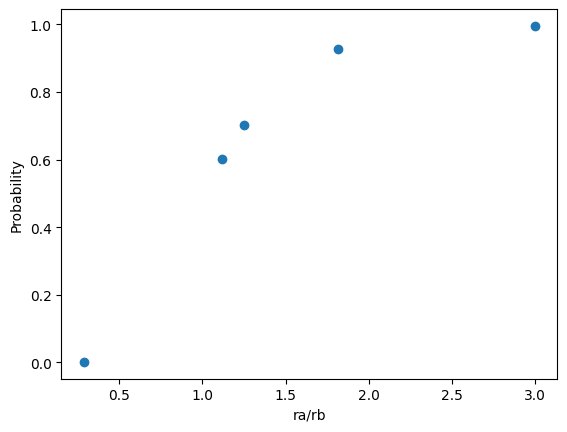

In [842]:
plot_win_probabilities(read_abilities("test.csv"))

**Question 1e:** Complete the following function `win_probability_match(ra, rb, simulations, m)` to simulate `simulations` matches which are won by the first player to win `m` games, and returns an estimate of the probability that a player with ability `ra` will win such a match against a player of ability `rb`.

Provide code that works out the smallest value of `m` such that `win_probability_match(60, 40, simulations, m)` is at least `0.9`. 

_HINT: make sure you use an appropriate value for `simulations`._

**[Functionality: 5 marks]**

In [843]:
# function defined
def win_probability_match(ra, rb, simulations, m):
    # set match wins and amount of simulations we want to do
    a_match_wins = 0 
    for sim in range(simulations):
        a_wins = 0
        b_wins = 0
        # peramaters that must be met in order for the loop to be broken and another simulation to begin
        while (a_wins < m) and (b_wins < m):
            results = game(ra, rb)
            if results[0] > results[1]:
                a_wins +=1
            else:
                b_wins +=1
        # if statment so value is only added if a wins a match
        if a_wins == m:
            a_match_wins += 1
    # value returned as a probability
    return a_match_wins/simulations

# testing which value of m gives you at least 0.9
m = 1

while win_probability_match(60, 40, 1000, m) < 0.9:
    m += 1

print(m)




    

2


Question 2
==========

Complete the remaining template of a scientific report that uses the results of simulation (with suitable input data) to investigate whether English or PARS is the ``better'' scoring method for squash matches. 

You should clearly state any assumptions you make, and may add any number of code cells. Guidance for completing the markdown/text cells is given in the coursework specification. The word count of the remaining markdown/text cells must be at most 750.

Your investigation should consider the relative ability of the two players (i.e. `ra/rb`) as the _independent variable_ and include appropriate figures that show how your choice of relevant _dependent variable_ varies. Your results **must** cover at least 50 different values of `ra/rb`.

Some starting points you may consider:
- How _fair_ is the scoring method - does the better player usually win?
- Shorter matches are usually preferable (e.g. for television) - if you assume each rally in a match takes equal time, how long do matches typically last?
- What effect does the relative ability of the two players have?

**[Report: 7 marks; Achievement: 8 marks]**

## Problem

Investigating the superior scoring method for squash matches English or PARS  has challenges due to the subjective nature of what is “better”. For my investigation I will be focusing on the fairness, and the length of the game.

PARS, with its direct point allocation, likely better represents fairness than the English system, which limits scoring to the server, potentially favouring the more skilled player.

A shorter game length may be better, due to potential issues with broadcasting if a game runs longer, this issue may arise with the english rule set that may take more rallies to finish a match.


## Method

To assess fairness and measure match duration, I'll calculate the probability of a player winning and count the number of rallies in a match.
First, I'll establish two functions reflecting the scoring systems for English and PARS rules:

English Rules:
- Points can only be scored by the server.
- Winning a rally as a non-server results in becoming the server without gaining points.
- The game is won at 9 points, except when tied at 8-8, where the first to reach 8 decides to play to 9 or 10.

PARS:
- The winner of a rally earns a point and maintains/becomes the server.
- The game concludes at 11 points with a minimum 2-point lead.

Player ability, represented as an integer between 0 and 100, will determine the probability 
of player A winning, computed by the function:

Player A Ability / Player B Ability + Player A Ability


Both functions must return the game result, influenced by both players' abilities, and include the number of rallies.


In [853]:
# English Scoring Functions --------------------------------

def game_english(a_ability, b_ability):
    # for both functions I will use the same calculation to find the probability that player a wins a point
    a_win_prob = a_ability / (a_ability + b_ability)
    a_score = 0
    b_score = 0
    a_server = random.randint(0, 1) 
    rally = 0 
    # while loop to ensure that is loops until either 9 is reached or if the score goes too 8 - 8 until 10 is reached
    while (a_score < 9 and b_score < 9):
        # if statement to check whether the a or b is the server allowing point allocating in english scoring style or server reallocation
        if a_server == 0:
            rand_num = random.uniform(0, 1)
            if rand_num < a_win_prob:
                a_score += 1
            else:
                a_server = 1
            rally += 1
        else:
            rand_num = random.uniform(0, 1)
            if rand_num < a_win_prob:
                a_server = 0
            else:
                b_score += 1
            rally += 1
        # this will check the scores if they reach 8-8 meaning the scoring system has chance to change
        if (a_score == 8 and b_score == 8):
            choice = random.randint(0, 1)
            # if it stays until 9 it will skip and just follow the main while loop
            if choice == 0:
                pass
            # otherwise it will go until either of the points reach 10
            else:
                while (a_score < 10 and b_score < 10):
                    if a_server == 0:
                        rand_num = random.uniform(0, 1)
                        if rand_num < a_win_prob:
                            a_score += 1
                        else:
                            a_server = 1
                        rally += 1
                    else:
                        rand_num = random.uniform(0, 1)
                        if rand_num < a_win_prob:
                            a_server = 0
                        else:
                            b_score += 1 
                        rally += 1 
    return a_score, b_score, rally

# Pars Scoring Functions --------------------------------

def game_pars(a_ability, b_ability):
    a_win_prob = a_ability / (a_ability + b_ability)
    a_points = 0
    b_points = 0 
    # while statement so that point allocation follows the rules of PARS
    while abs(a_points - b_points) < 2 or (a_points < 11 and b_points < 11):
        rand_num = random.uniform(0, 1)
        if rand_num < a_win_prob:
            a_points += 1
        else:
            b_points += 1
    return a_points, b_points, a_points + b_points




Testing will occur with random.seed(30), and both players will consistently have an ability score of 50. It's essential to verify that the function adheres to the specified rule set.

In [854]:
# Testing for each of the functions to show they create results with intended rule sets.
random.seed(30)

print(game_english(50, 50))

print(game_pars(50, 50))


(10, 8, 31)
(11, 7, 18)


Now the two functions return outcomes and rally count, we can calculate probability that player A wins a match, and count how many rallies are in an average match. A match is usually best of 5 so it will be first to win three games.

In [855]:
# defined function for match simulations

def match_probability_sim(a_ability, b_ability, simulations, rule_type):
    # variable in which we want returned, this is how we will find our probability and average
    a_match_wins = 0 
    total_rallys = 0
    # looping for the amount of simulations that we want 
    for sim in range(simulations):
        # every time a new loop start the number of wins is set to 0
        a_wins = 0 
        b_wins = 0 
        while(a_wins < 3 and b_wins < 3):
            # ability to use rule type, so ther aren't two separate functions too simulate different rules
            if rule_type == "english":
                results = game_english(a_ability, b_ability)
            else:
                results = game_pars(a_ability, b_ability)
            # allocating win "points" by finding out which of the end values is higher as that indicate who won the game
            if results[0] > results[1]:
                a_wins += 1
            else:
                b_wins += 1
            # calculating the total amount of rallys, we can get this value from the game functions written earlier
            total_rallys += results[2]

        if a_wins > b_wins:
            a_match_wins += 1
    # this will return the probability that A wins the game, and the average amount of rallys within the games
    return (a_match_wins/simulations), total_rallys/simulations

To ensure the results are accurate we must conduct these tests with a large amount of simulations, the greater the simulations, the greater the accuracy, but also greater the time taken to run the simulations. 

In [848]:

random.seed(30)

print(match_probability_sim(50, 50, 1000, "english"))

print(match_probability_sim(50, 50, 1000, "pars"))

(0.505, 115.689)
(0.473, 77.085)


Now we can calculate probabilities and rally length, when we can produce a graph to show the results. To observe impact of ability we must iterate from 1 to 100 assigning each integer to Player A's ability as an independent variable, while player B's ability remains at 50. I will create two graphs for rallies and probabilities, each with two lines representing the rule types.

The Rally length and probabilities will be plotted against Player As ability relative to Player Bs


In [856]:
def graph(graph_type):
    # empty lists created so values can be added to them. 
    x1 = []
    y1 = []
    y2 = []
    # controlled variable player ability B, ability of Player A will be are Independent variable
    b_ability = 50
    # looping through 100 integer values that will be used to represent Player A ability, as this changes we should see change in the graph
    for a in range(101):
        a_ability = a
        # decide graphy type you want to see either match or match rallys 
        if graph_type == "match": 
            x1.append(a_ability/b_ability)
            y1.append(match_probability_sim(a_ability, b_ability, 1000, "english")[0])
            y2.append(match_probability_sim(a_ability, b_ability, 1000, "par")[0])
            plt.xlabel("ra/rb")
            plt.ylabel("Probability")
            plt.title("Probability Player A wins a match based on their ability Relative to player B")
        elif graph_type == "match rallys":
            x1.append(a_ability/b_ability)
            y1.append(match_probability_sim(a_ability, b_ability, 1000, "english")[1])
            y2.append(match_probability_sim(a_ability, b_ability, 1000, "par")[1])
            plt.xlabel("ra/rb")
            plt.ylabel("rallys per match")
            plt.title("Rallys per match")
    # fucntions for plotting graphs
    plt.plot(x1, y1, label = "english scoring")
    plt.plot(x1, y2, label = "Pars Scoring")
    plt.legend(["English Scoring", "PARS Scoring"])
    plt.grid()
    plt.show()

    


## Assumptions

Several assumptions underlie these tests, most obviously the measure of a player's skill, which may be too vague e.g a player may be better off a serve than return. Rallies may not be at the same time, so doesn’t show the exact length but may indicate it. The choice whether a game goes to 9 or 10 points is also random, however  certain players may have certain biases to how long a game is. 

## Results

The first graph shows the probability the player A wins a game with skill relative to player B. The impact of rule type on fairness was very minimal with only slight variations. When Player B has greater ability, the probability of Player A winning is slightly lower in the English scoring system, and vice versa. 

The second graph, does outline a difference. When presenting the number of rallies in a match while the ability ratio is less than 0.2 the number of rallies is lower in the English system compared to PARS. After this ration point however the English system consistently records more rallies, with the most significant difference occurring at the midpoint. This can be explained due when two players are equal ability under english scoring, there is more likely to be rallies where no points are scored, but the server changes hence taking longer for game to finish.


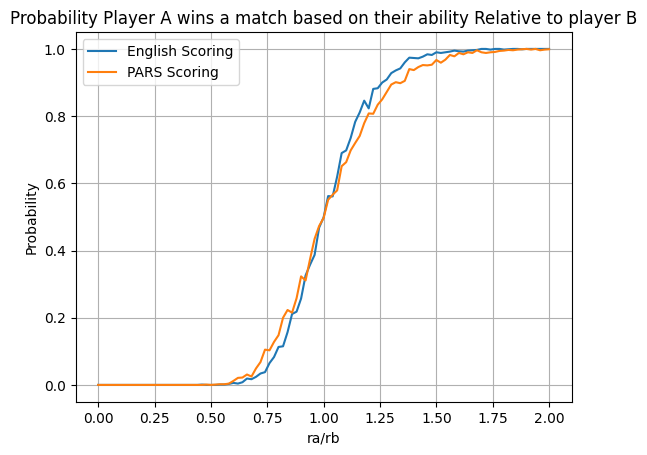

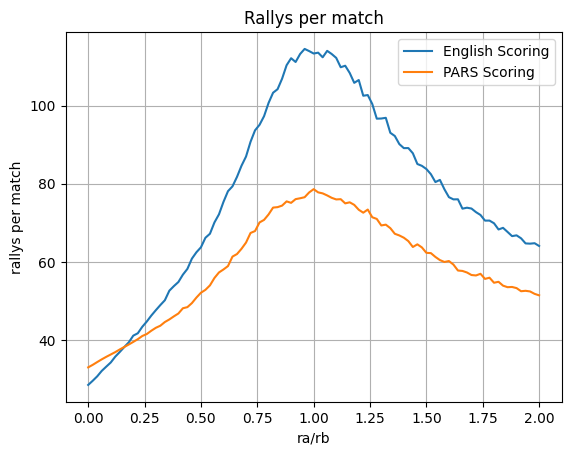

In [857]:
graph("match")
graph("match rallys")

## Conclusions

The first graph indicates nearly identical probabilities between the two game types, with both showing a trend favouring the player with higher ability. However, the second graph highlights the potential time disparity in matches played under English scoring. Longer matches pose challenges for entertainment and broadcasting. Consequently, it can be inferred that PARS is the more favourable scoring system.

This investigation involved various assumptions. Future research should aim to minimise these assumptions for more precise and reliable results.
